In [38]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from sghmc_pkg.algorithms_sim import SGHMC_sim
from sghmc_pkg.algorithms_data import SGHMC_data

### Reasonably close to target distribution

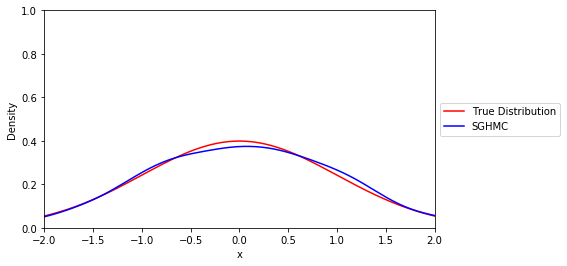

In [39]:
# uni-modal simulation

xs = np.linspace(-2, 2, 200)
ys = scipy.stats.norm.pdf(xs)

epsilon = 0.1
nt = 1000
m = 50
M = 1
V = 1
theta_init = 0
B_hat = C = 1/2*epsilon*V
formula = lambda x: 0

u_func = lambda x: 0.5*np.log(2*np.pi) + 0.5*x**2
du_func = lambda x: x
du_hat_func = lambda x: x + np.random.normal(0, np.sqrt(V))
theta_sghmc = SGHMC_sim(du_hat_func, epsilon, nt, m, M, C, B_hat, theta_init, None, formula, resample = True).theta()
plt.subplots(figsize=(7, 4))
plt.plot(xs, ys, color = 'red', label = 'True Distribution')
sns.distplot(theta_sghmc, hist = False, color = 'blue', label = 'SGHMC')
plt.axis([-2, 2, 0, 1,])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

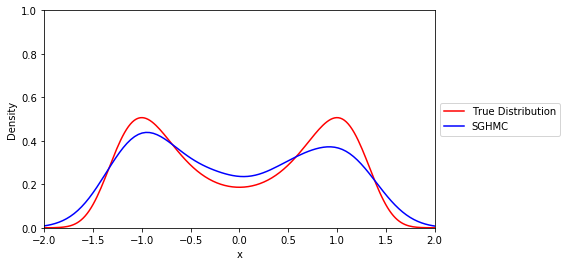

In [40]:
# multi-modal simulation

# true distribution
p_func = lambda x: np.exp(2*x**2 - x**4)
xs = np.linspace(-2, 2, 200)
ys = p_func(xs)/quad(p_func, float('-Inf'), float('Inf'))[0]

# SGHMC
u_func = lambda x: -2*x**2 + x**4
du_func = lambda x: -4*x + 4*x**3
epsilon = 0.1
nt = 1000
m = 50
M = 1
V = 4
theta_init = 0
B_hat = C = 1/2*epsilon*V
u_hat_func = u_func
formula = lambda x: 0
du_hat_func = lambda x:  -4*x + 4*x**3 + np.random.normal(0, np.sqrt(V))
theta_sghmc = SGHMC_sim(du_hat_func, epsilon, nt, m, M, C, B_hat, theta_init, None, formula = lambda x: 1/(x+100), resample = True).theta()

plt.subplots(figsize=(7, 4))
plt.plot(xs, ys, color = 'red', label = 'True Distribution')
sns.distplot(theta_sghmc, hist = False, color = 'blue', label = 'SGHMC')
plt.axis([-2, 2, 0, 1,])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

### Correctly handles wrong input and gives suitable error messages.

In [41]:
try:
    SGHMC_sim(du_hat_func, epsilon, nt, m, -1, C, B_hat, theta_init, None, formula = lambda x: 1/(x+100), resample = True).theta()
except AssertionError as err:
    print(err)

M should be greater than 0, and B_hat should be no less than 0


In [42]:
try:
    SGHMC_sim(du_hat_func, epsilon, nt, m, M, 0, 1, theta_init, None, formula = lambda x: 1/(x+100), resample = True).theta()
except AssertionError as err:
    print(err)

C should be no less than B_hat


In [43]:
# multi-dimensinal input with wrong shape
sigma = np.array([1, 0.9, 0.9, 1]).reshape(2, 2)
u_func = lambda x: 1/2 * x.T @ np.linalg.inv(sigma) @ x
du_hat_func = lambda x: np.linalg.inv(sigma) @ x + np.random.multivariate_normal(np.array([0,0]), np.eye(2))
epsilon = 0.1
nt = 250
M = np.eye(2)
V = np.eye(2)
B_hat = C = 1/2*epsilon*V
theta_init = np.array([0,0])
r_init = np.random.multivariate_normal(np.array([0,0]), M)
formula = lambda x: 0
try: 
    theta_sghmc = SGHMC_sim(du_hat_func, epsilon, nt, m, np.zeros(100), C, B_hat, theta_init, None, formula = lambda x: 1/(x+100), resample = True).theta()
except AssertionError as err:
    print(err)

M, B_hat and C should have the same shape
